In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
Base_Dados = pd.read_csv('unicorns till sep 2022.csv')

Base_Dados.shape

(1186, 7)

In [5]:
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [6]:
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [6]:
Base_Dados.rename( columns = {
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor($)',
    'Date Joined': 'Data de Adesão',
    'Country': 'País',
    'City ': 'Cidade',
    'Industry': 'Setor',
    'Investors': 'Investitores'
    
}, inplace =True),

(None,)

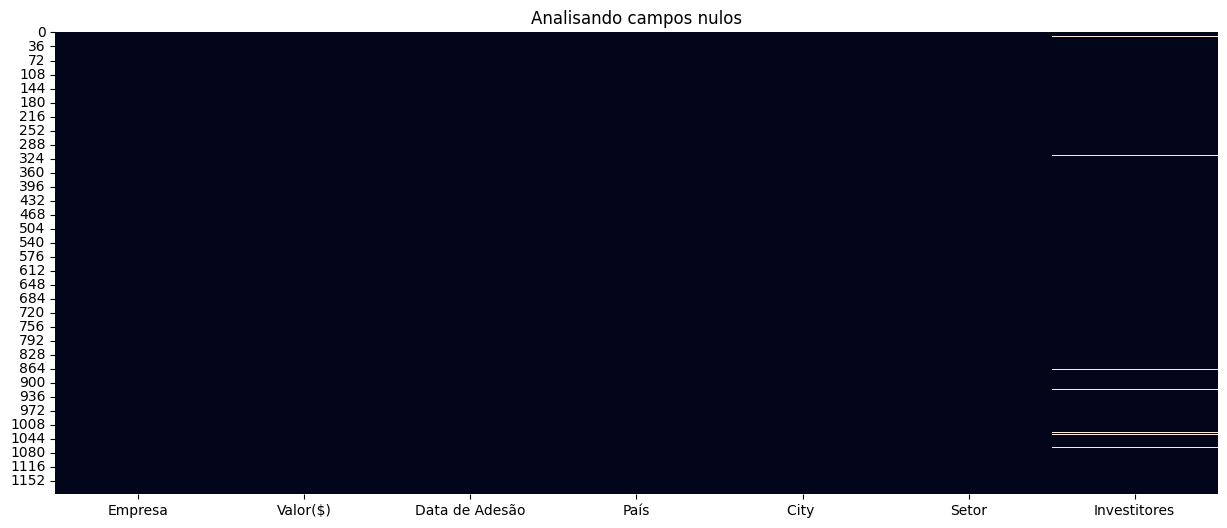

In [102]:
plt.figure( figsize=(15,6) )
plt.title("Analisando campos nulos")
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [12]:
Base_Dados.nunique()

Empresa           1183
Valor($)           222
Data de Adesão     695
País                48
City               286
Setor               34
Investitores      1152
dtype: int64

In [13]:
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [14]:
Base_Dados['País'].unique()

array(['China', 'United States', 'Australia', 'United Kingdom', 'Bahamas',
       'India', 'Indonesia', 'Germany', 'Turkey', 'Hong Kong',
       'Seychelles', 'Sweden', 'Mexico', 'Estonia', 'Canada',
       'Netherlands', 'France', 'Israel', 'Finland', 'Colombia',
       'Belgium', 'Brazil', 'South Korea', 'Denmark', 'Switzerland',
       'Lithuania', 'Austria', 'Ireland', 'Singapore', 'Vietnam',
       'United Arab Emirates', 'Argentina', 'Spain', 'Japan',
       'Luxembourg', 'Nigeria', 'Philippines', 'Croatia', 'Senegal',
       'Malaysia', 'Bermuda', 'Norway', 'South Africa', 'Ecuador',
       'Chile', 'Thailand', 'Czech Republic', 'Italy'], dtype=object)

In [16]:
Base_Dados['Setor'].value_counts(normalize=True)

Setor
Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                        

<BarContainer object of 14 artists>

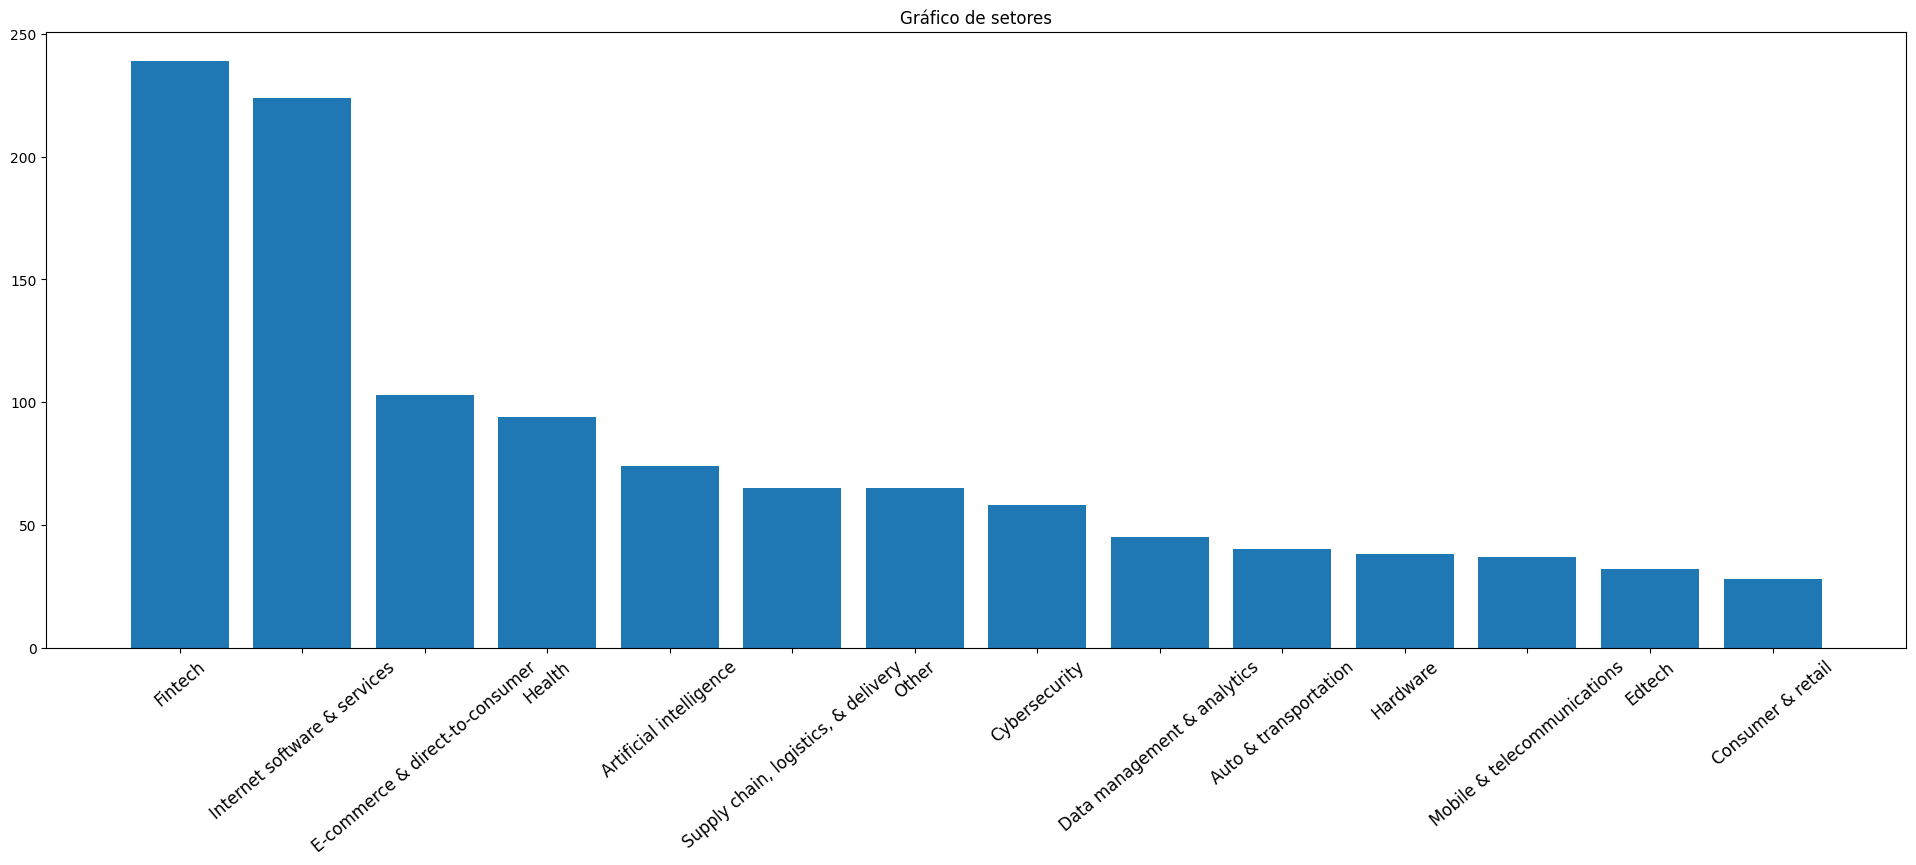

In [61]:
plt.figure( figsize=(24,8) )
plt.rcParams['xtick.labelsize'] = 12
plt.title("Gráfico de setores")
plt.xticks(rotation=40)
plt.bar(Base_Dados['Setor'].value_counts().index[:14], Base_Dados['Setor'].value_counts()[:14])

In [68]:
porcentagens = round(Base_Dados['País'].value_counts(normalize=True) * 100, 1)
porcentagens

País
United States           53.6
China                   14.7
India                    5.9
United Kingdom           3.9
Germany                  2.4
France                   2.0
Israel                   1.9
Canada                   1.6
Brazil                   1.4
South Korea              1.4
Singapore                1.1
Sweden                   0.7
Mexico                   0.7
Australia                0.7
Indonesia                0.6
Netherlands              0.6
Hong Kong                0.6
Ireland                  0.5
Japan                    0.5
Switzerland              0.5
Norway                   0.4
Finland                  0.3
Spain                    0.3
Turkey                   0.3
Colombia                 0.3
Belgium                  0.3
United Arab Emirates     0.3
Austria                  0.2
Lithuania                0.2
Vietnam                  0.2
Thailand                 0.2
Estonia                  0.2
Chile                    0.2
Denmark                  0.2
Philippin

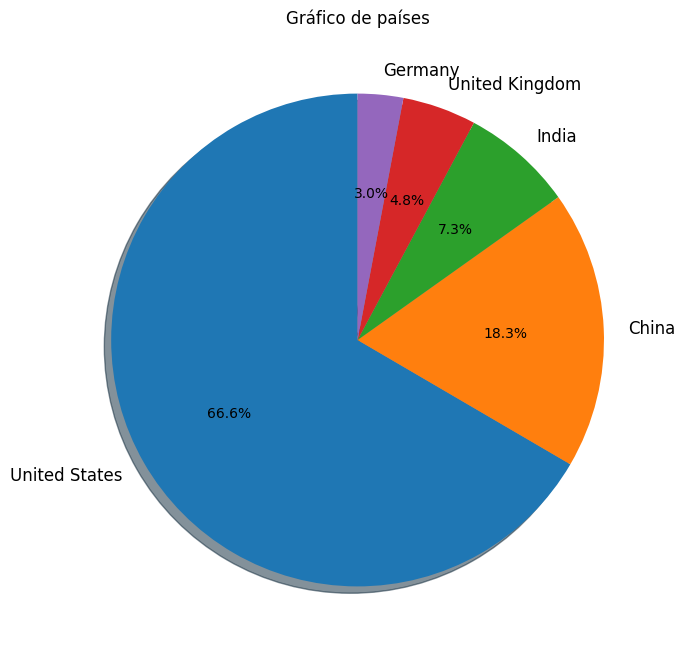

In [76]:
paises = porcentagens.index[:5]  # Os 5 primeiros países
valores = porcentagens.values[:5]  # As porcentagens correspondentes

plt.figure(figsize=(8, 8))  
plt.pie(valores, labels=paises, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Gráfico de países')

plt.show()

In [10]:
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])
Base_Dados.head()

,Empresa,Valor($),Data de Adesão,País,City,Setor,Investitores
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [11]:
Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year

Base_Dados.head()

,Empresa,Valor($),Data de Adesão,País,City,Setor,Investitores,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [28]:
Analise_Agrupada = Base_Dados.groupby(by=['País', 'Ano', 'Mes', 'Empresa', 'Setor']).count()['ID'].reset_index()

Analise_Agrupada

,País,Ano,Mes,Empresa,Setor,ID
0,Argentina,2021,8,Uala,Fintech,1
1,Australia,2018,1,Canva,Internet software & services,1
2,Australia,2019,3,Airwallex,Fintech,1
3,Australia,2021,5,SafetyCulture,Internet software & services,1
4,Australia,2021,7,Culture Amp,Internet software & services,1
...,...,...,...,...,...,...
1181,United States,2022,8,Flow,Fintech,1
1182,United States,2022,8,Incredible Health,Internet software & services,1
1183,United States,2022,8,Orna Therapeutics,Health,1
1184,Vietnam,2021,10,Sky Mavis,Internet software & services,1


In [29]:
Analise_Agrupada.loc[
 Analise_Agrupada['País'] == 'Brazil'
]

,País,Ano,Mes,Empresa,Setor,ID
16,Brazil,2018,7,Movile,Mobile & telecommunications,1
17,Brazil,2018,11,iFood,"Supply chain, logistics, & delivery",1
18,Brazil,2019,6,Loggi,"Supply chain, logistics, & delivery",1
19,Brazil,2019,9,QuintoAndar,E-commerce & direct-to-consumer,1
20,Brazil,2019,10,EBANX,Fintech,1
21,Brazil,2019,12,Wildlife Studios,Other,1
22,Brazil,2020,1,Loft,E-commerce & direct-to-consumer,1
23,Brazil,2020,12,C6 Bank,Fintech,1
24,Brazil,2020,12,Creditas,Fintech,1
25,Brazil,2021,1,MadeiraMadeira,E-commerce & direct-to-consumer,1


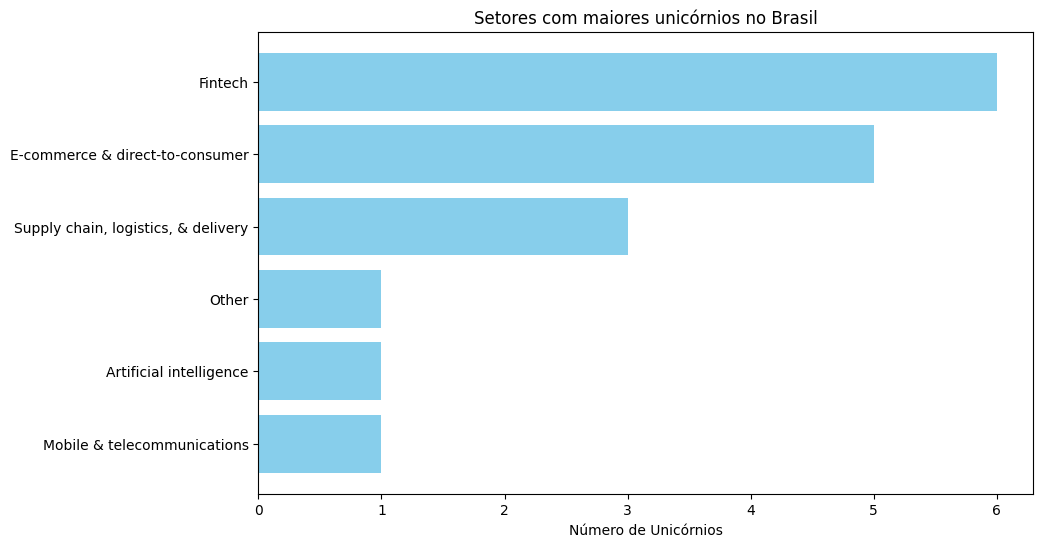

In [42]:
# Filtrando para o Brasil
Base_Dados_Brasil = Base_Dados.loc[Base_Dados['País'] == 'Brazil']

# Contando a quantidade de unicórnios por setor
contagem_setores = Base_Dados_Brasil['Setor'].value_counts()

# Pegando os 5 setores com mais unicórnios
top_setores = contagem_setores.head(6)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_setores.index, top_setores, color='skyblue')
plt.xlabel('Número de Unicórnios')
plt.title('Setores com maiores unicórnios no Brasil')
plt.gca().invert_yaxis()  # Inverte o eixo y para que o setor com mais unicórnios fique no topo
plt.show()



In [20]:
Base_Dados['Valor($)'] = pd.to_numeric(Base_Dados['Valor($)'].apply(lambda Linha: Linha.replace('$', '')))

Base_Dados.head()

,Empresa,Valor($),Data de Adesão,País,City,Setor,Investitores
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [21]:
Analise_Pais = Base_Dados.groupby(by=['País']).sum()['Valor($)'].reset_index()

Analise_Pais.head()

,País,Valor($)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


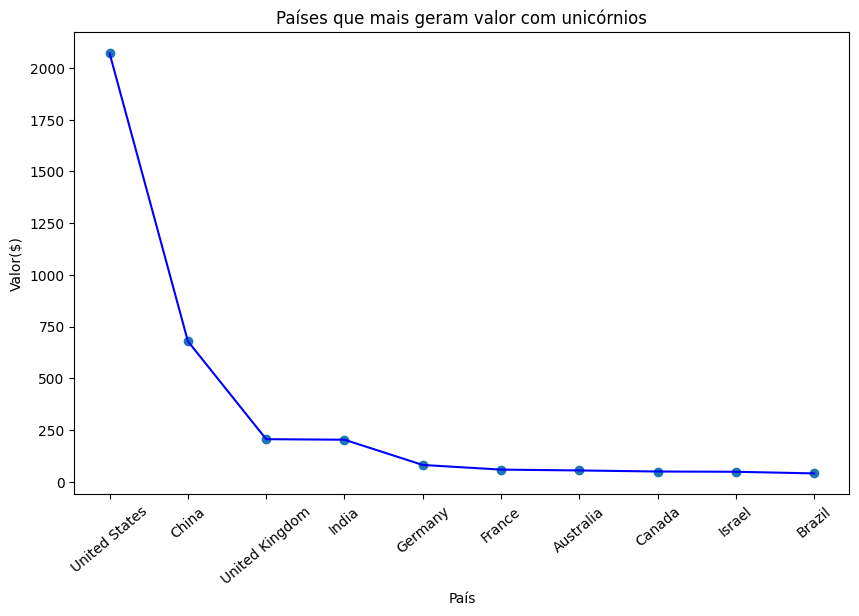

In [33]:
dados_ordenados = Analise_Pais.sort_values('Valor($)', ascending=False)

# Criando o gráfico
top_valores = dados_ordenados.head(10)
plt.figure(figsize=(10,6))
plt.scatter(top_valores['País'], top_valores['Valor($)'])
plt.plot(top_valores['País'], top_valores['Valor($)'], color='blue') 
plt.xlabel('País')
plt.ylabel('Valor($)')
plt.title('Países que mais geram valor com unicórnios')
plt.xticks(rotation=40)
plt.show()
